In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

y = digits.target.copy() #为了防止修改原数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
dmin = np.min(decision_scores)
dmax = np.max(decision_scores)

In [6]:
thresholds = np.arange(dmin, dmax, 0.01) #每0.01为一个步长

In [7]:
import sys
sys.path.append("..")
from myML.matrics import FPR, TPR

FPRs = []
TPRs = []

for t in thresholds:
    y_predict = np.array(decision_scores >= t, dtype = 'int')
    f = FPR(y_test, y_predict)
    FPRs.append(f)
    t = TPR(y_test, y_predict)
    TPRs.append(t)
    

### ROC curve: 无辜的人抓的越多，说明召回率也越多（因为真正的坏人抓的也多）

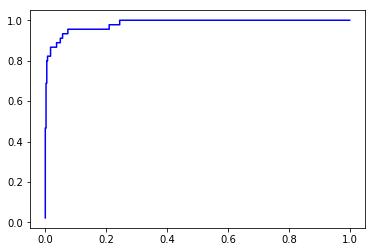

In [8]:
plt.plot(FPRs, TPRs, color = 'b')
plt.show()

### ROC in sklearn

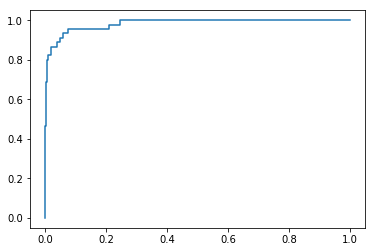

In [10]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.show()

### ROC 下面的面积越大，模型分类效果越好：
1. 当x一定的时候，也就是fpr一定，也就是无辜的人中，误认成错误的犯人相等的时候
2. 此时如果roc越靠上，说明tpr高，说明相同误抓犯人的时候，召回率更高

#### ROC下面的面积值：area under curve (auc), 其最大值为1，因为定义域和值域取值范围是[0,1]

In [11]:
from sklearn.metrics import roc_auc_score

In [12]:
roc_auc_score(y_test, decision_scores)

0.9830452674897119

### ROC auc: 

对于有偏数据不敏感，因为你看我们的auc结果还是不错的，但是实际上模型并不是很好。

ROC更多是用来对比，两个模型孰优孰劣。

### 对于有偏数据：

precision score 和 recall score 更能代表模型的好坏